## **Step 1: Understanding Scalars vs. Vectors**
- **Scalar:** A single number (e.g., temperature = 37°C, age = 25).
- **Vector:** An ordered list of numbers (e.g., position in 3D space = `[x, y, z]`).

### **Example:**
- A point in 2D space: `[3, 4]` (where `3` is x-coordinate, `4` is y-coordinate).
- A feature vector in ML: `[age=25, height=170cm, weight=65kg]`

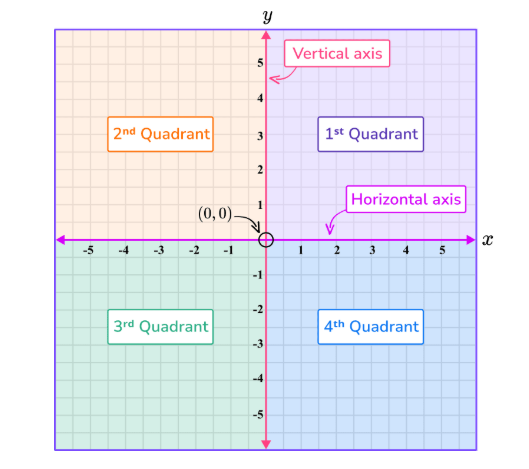 

## **Step 2: Vector Representation**
Vectors can be represented in different ways:
1. **As a list of numbers:** `[1, 2, 3]`
2. **As a column in a matrix:**  
   ```
   [1]
   [2]
   [3]
   ```

3. **Graphically (in 2D/3D):** An arrow from origin `(0,0)` to `(3,4)`.

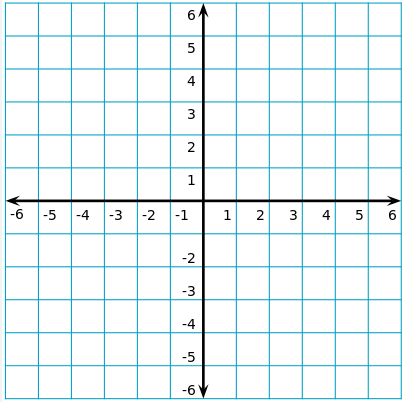 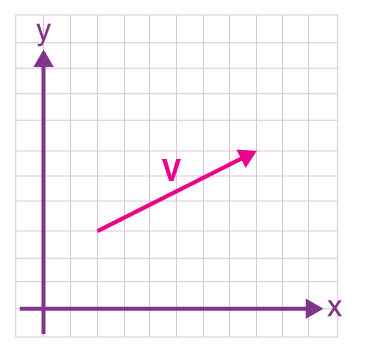

## **Step 3: Basic Vector Operations**


### **(A) Vector Addition**
- Add corresponding elements:  
  `[1, 2] + [3, 4] = [1+3, 2+4] = [4, 6]`

### **(B) Scalar Multiplication**
- Multiply each element by a scalar (single number):  
  `2 * [1, 2] = [2, 4]`


### **(C) Dot Product (Inner Product)**
- Sum of element-wise multiplication:  
  `[1, 2] · [3, 4] = (1×3) + (2×4) = 3 + 8 = 11`  
  *(Used in similarity calculations in ML.)*

### **(D) Magnitude (Length) of a Vector**
- For `v = [3, 4]`, magnitude = `√(3² + 4²) = 5`  
  *(Used in normalization.)*

----------------------

### **What is Normalization?**  
**Normalization** scales vectors (or data) to have a **unit length** (magnitude of 1) while preserving their direction. This ensures fair comparisons in similarity calculations (e.g., dot product) by removing the influence of vector size.  

### **Why Normalize?**  
1. **Eliminates Bias from Magnitude:**  
   - A longer vector (e.g., `[3, 4]`) will dominate the dot product over a shorter one (e.g., `[1, 1]`), even if their directions are similar.  
   - Normalization makes comparisons **scale-invariant**.  

### **Example: Why Normalization Matters for Dot Product**  

#### **Scenario:**  
We have two pairs of vectors:  
1. **Pair A:** `[3, 4]` and `[1, 1]` (different magnitudes)  
2. **Pair B:** `[0.6, 0.8]` (normalized `[3, 4]`) and `[0.707, 0.707]` (normalized `[1, 1]`)  

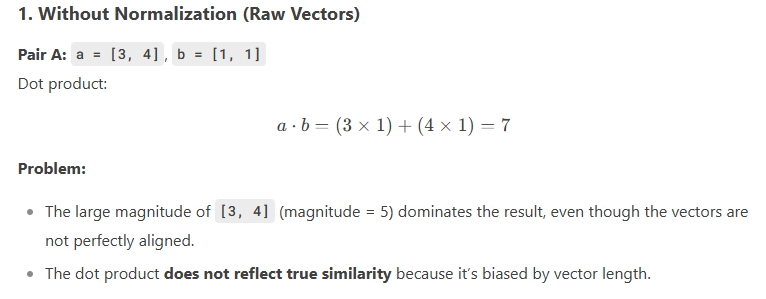

---------------

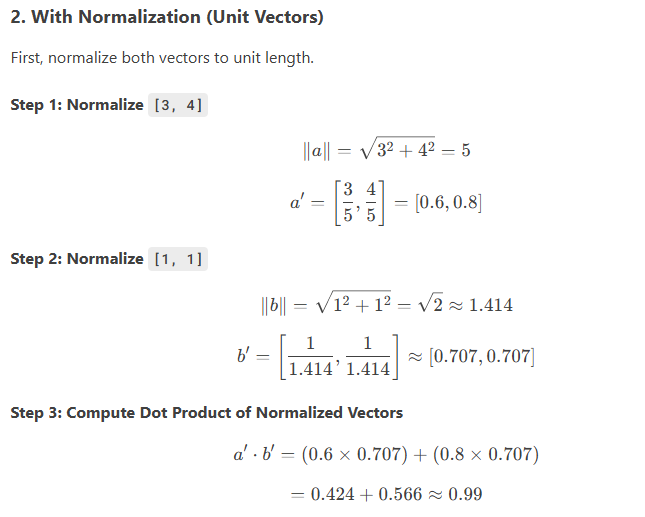


**Interpretation:**  
- The normalized dot product (**≈0.99**) is now **scale-invariant**.  
- It reflects the **true angular similarity** (close to 1, meaning the vectors point in nearly the same direction).  

---

### **Key Insight**  
| Metric          | Unnormalized Dot Product | Normalized Dot Product (Cosine Similarity) |
|-----------------|--------------------------|--------------------------------------------|
| **Value**       | 7                        | ≈0.99                                      |
| **Interpretation** | Biased by magnitude    | Pure direction similarity (angle)          |  

#### **Why?**  
- The raw dot product of `[3,4]` and `[1,1]` is **7**, but this is misleading because `[3,4]` is longer.  
- After normalization, the dot product becomes **≈0.99**, showing they are **almost identical in direction**.  

---


In [2]:
import numpy as np

# Unnormalized vectors
a = np.array([3, 4])
b = np.array([1, 1])
print("Raw dot product:", np.dot(a, b))  # Output: 7

# Normalized vectors
a_normalized = a / np.linalg.norm(a)
b_normalized = b / np.linalg.norm(b)
print("Normalized dot product:", np.dot(a_normalized, b_normalized))  # Output: ~0.99

Raw dot product: 7
Normalized dot product: 0.9899494936611665


**Conclusion:** Normalization ensures fairness in similarity comparisons by **ignoring magnitude** and focusing on **direction**.

-----------------------

2. **Used in Cosine Similarity:**  
   - Cosine similarity = Normalized dot product.  

### **Example: Cosine Similarity = Normalized Dot Product**  

#### **Scenario:**  
We want to measure the **similarity between two text documents** using **cosine similarity**, which is just the **dot product of their normalized vectors**.  

---

### **Step 1: Represent Documents as Vectors**  
Suppose we have two documents:  
- **Document 1 (D1):** "Machine learning is fun"  
- **Document 2 (D2):** "Deep learning is fun"  

We first create a **bag-of-words (BoW)** representation:  

| Word      | D1 Count | D2 Count |
|-----------|----------|----------|
| Machine   | 1        | 0        |
| learning  | 1        | 1        |
| is        | 1        | 1        |
| fun       | 1        | 1        |
| Deep      | 0        | 1        |

**Vectors:**  
- **D1:** `[1, 1, 1, 1, 0]`  
- **D2:** `[0, 1, 1, 1, 1]`  

---

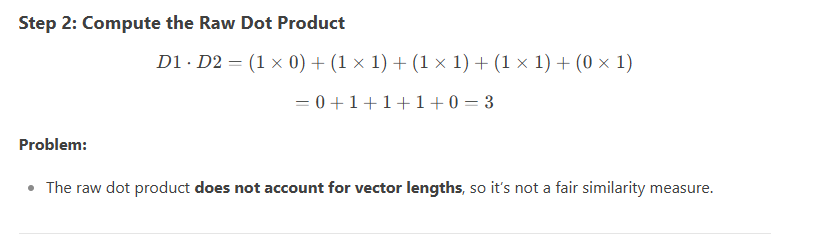

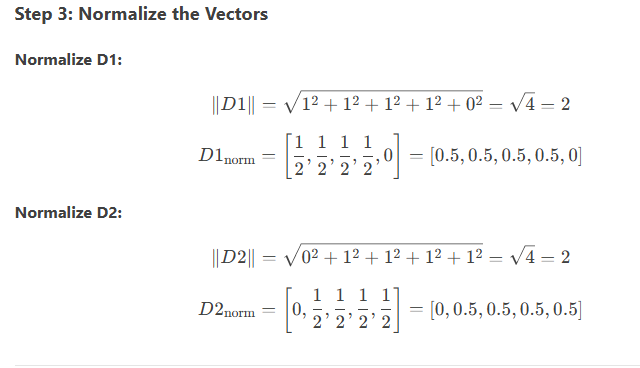

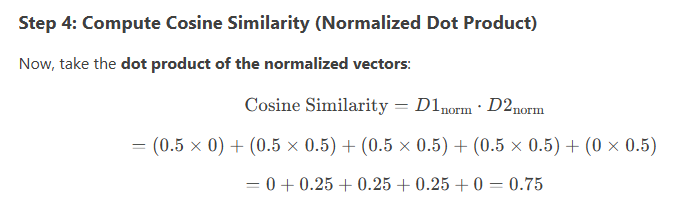

---------------------


### **Interpretation**  
| Metric          | Raw Dot Product | Cosine Similarity (Normalized Dot Product) |
|-----------------|-----------------|--------------------------------------------|
| **Value**       | 3               | 0.75                                       |
| **Meaning**     | Biased by magnitude | True angular similarity (0.75 = moderately similar) |

- **Cosine similarity ranges from 0 to 1:**  
  - **1** = Identical documents (same direction).  
  - **0** = Completely different (orthogonal).  
- Here, **0.75** means the documents share **3 out of 4 words** (excluding "Machine" and "Deep").  

---



### **Why Use Cosine Similarity?**  
- **Ignores document length:** A long document won’t dominate just because it has more words.  
- **Focuses on word overlap:** Measures **semantic similarity** rather than raw counts.  

In [ ]:
import numpy as np

# Raw vectors
D1 = np.array([1, 1, 1, 1, 0])
D2 = np.array([0, 1, 1, 1, 1])

# Cosine similarity = normalized dot product
cos_sim = np.dot(D1, D2) / (np.linalg.norm(D1) * np.linalg.norm(D2))
print("Cosine Similarity:", cos_sim)  # Output: 0.75

### **Final Answer:**  
**Cosine similarity is just the dot product of normalized vectors.**  
- Normalization removes the effect of magnitude, making it a **fair similarity measure**.  
- In this example, **cosine similarity = 0.75**, showing the documents are **75% similar** in direction.  

-----------------------

### **Why Use Cosine Similarity? A Simple Explanation**  

Imagine you’re comparing two books:  
- **Book A:** A short children’s book with the words: *"The cat sat on the mat."*  
- **Book B:** A long novel that mentions *"The cat sat on the mat"* but also has 100 extra pages about other topics.  

#### **Problem with Raw Word Counts (Dot Product)**  
If you just count how many words match:  
- Book B will **always win** because it’s longer, even if only a small part is about cats.  
- This is unfair—you want to measure **how similar the topics are**, not how long the book is.  

#### **Solution: Cosine Similarity**  
Instead of counting raw matches, cosine similarity asks:  
*"What fraction of Book A’s words are also in Book B?"*  

**How it works:**  
1. **Ignores Length:** It doesn’t care if Book B is 10x longer—it only cares about the **percentage of shared words**.  
   - Example:  
     - Book A: 5 words (*"the, cat, sat, on, mat"*).  
     - Book B: 5 matching words + 100 others.  
     - Cosine similarity = *"5 matching words / (5 total in A and ~5 relevant in B)"* ≈ high similarity for the cat/mat part.  

2. **Focuses on Overlap:** It checks if the books **talk about the same things**, not how much they talk.  
   - Like saying: *"Both books mention cats and mats, so they’re similar in topic, even if one is longer."*  

#### **Real-World Example**  
- **Google Search:** Finds pages matching your query **by topic** (not just by how many words they contain).  
- **Spotify Recommendations:** Suggests songs with **similar themes** (not just the same words repeated 100x).  

**Key Idea:**  
- **Raw counts (dot product):** *"How many words match?"* (Biased toward longer docs).  
- **Cosine similarity:** *"How much do these texts talk about the same things?"* (Fair for all lengths).  

---

### **Why This Matters**  
- **Short tweet vs. Long article:** Both can be "similar" if they discuss the same idea.  
- **Spam detection:** A spammy long email won’t trick the system just by repeating words.  

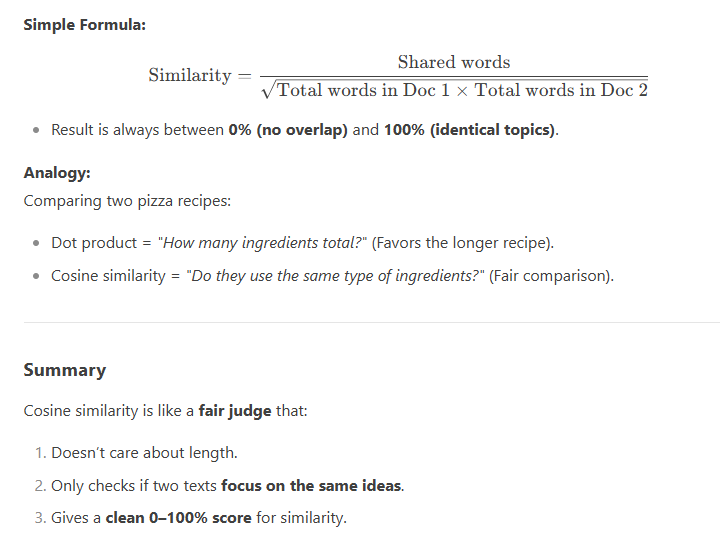

-------------------------------------------------
-------------------------------------------------

## **Step 4: Vectors in Data Science & ML**

### **1. Feature Vectors**
- A row in a dataset is a vector.  
  Example:  
  ```
  [Age=25, Salary=50000, CreditScore=700]  
  ```

### **2. Distance Metrics (Used in KNN, Clustering)**
- **Euclidean Distance:**  
  `distance = √((x₂−x₁)² + (y₂−y₁)²)`  
  *(Measures how far two vectors are.)*

### **3. Cosine Similarity (Used in NLP, Recommendations)**
- Measures angle between two vectors:  
  `cos(θ) = (A · B) / (||A|| ||B||)`  
  *(Used in text similarity, collaborative filtering.)*

---

## **Step 5: Vectors in Deep Learning & Gen AI**
### **1. Word Embeddings (NLP)**
- Words are represented as vectors (e.g., Word2Vec, GloVe).  
  Example:  
  `"king" → [0.2, -0.5, 0.7]`  
  `"queen" → [0.3, -0.4, 0.6]` 

### **2. Neural Networks**
- Each neuron’s input is a weighted sum of a vector.  
  `output = activation(weights · inputs + bias)`
### **3. Latent Space in Gen AI (Diffusion Models, GANs)**
- Images/text are compressed into vectors in a "latent space."  
  Example:  
  - A face image → `[0.1, -0.3, ..., 0.8]`  
  - Generating new faces = sampling new vectors in this space.

---

## **Step 6: Practical Implementation (Python)**

In [20]:
import numpy as np

In [21]:
# Creating vectors
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

In [22]:
# Addition
print(v1 + v2)  # Output: [5, 7, 9]

[5 7 9]


In [23]:
# Dot product
print(np.dot(v1, v2))  # Output: 32 (1×4 + 2×5 + 3×6)

32


In [24]:
# Magnitude
print(np.linalg.norm(v1))  # Output: √(1² + 2² + 3²) ≈ 3.74

3.7416573867739413


In [25]:
# Cosine similarity
cos_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
print(cos_sim)  # Output: ~0.974 (very similar)

0.9746318461970762


-----------------------------------------


### **1. Matrices & Tensors: The "Spreadsheets" of AI**
#### **What are they?**
- **Matrix**: A grid of numbers (like an Excel sheet).  
  - Example:  
    ```
    [ [1, 2], 
      [3, 4] ]
    ```  
    (2 rows × 2 columns)

- **Tensor**: A multi-dimensional matrix (used in deep learning).  
  - Scalar (0D) → Vector (1D) → Matrix (2D) → Tensor (3D+).  


#### **Why they matter in AI/ML?**
- **Neural Networks**: Every layer’s weights are stored as matrices.  
- **Images**: A 3D tensor = `[height, width, color_channels]`.  
- **Natural Language Processing (NLP)**: Word sequences are tensors (e.g., `[batch_size, sequence_length, embedding_dim]`).


#### **Analogy**:  
Think of a **recipe book**:  
- A **vector** is a single recipe ingredient list.  
- A **matrix** is the entire recipe (rows = steps, columns = ingredients).  
- A **tensor** is a library of recipe books (3D: books × steps × ingredients).

------------------


### **2. PCA (Dimensionality Reduction): "Compressing Data"**
#### **What does it do?**  
PCA finds the **most important "directions"** (called *principal components*) in your data and projects it onto a simpler space.  

#### **Example**:  
Imagine you have data about cars:  
- Features = `[speed, engine power, price, weight, fuel efficiency]` (5D).  
- PCA might reveal that 98% of the data can be explained by just 2 directions:  
  - **PC1**: "Performance" (combines speed + engine power).  
  - **PC2**: "Cost Efficiency" (combines price + fuel efficiency).  

Now, you can plot cars in 2D instead of 5D!  

#### **Why use PCA?**  
- Removes noise/redundancy (e.g., `weight` might correlate with `engine power`).  
- Speeds up ML models (less data to process).  
- Visualizes high-dimensional data (e.g., 3D→2D).  

#### **Analogy**:  
PCA is like **summarizing a movie with 3 emojis** instead of a 2-hour script. You keep the essence but discard details.



---

### **3. Transformers & Attention (Gen AI): "The Brain’s Focus Mechanism"**
#### **Key Idea**:  
Transformers (like GPT) use **attention** to decide which parts of input data (e.g., a sentence) to "focus" on.  

#### **How it works**:  
1. **Input**: "The cat sat on the mat."  
2. **Attention Steps**:  
   - To understand "sat", the model focuses more on "cat" (subject) and "mat" (object).  
   - It assigns **weights** (attention scores) to each word:  
     ```
     "cat" → 0.6, "mat" → 0.3, "the" → 0.1
     ```  
3. **Output**: Context-aware predictions (e.g., next word = "sleeping").  

#### **Why it’s revolutionary**:  
- Handles long-range dependencies (e.g., "The cat, which was very tired, [...] sat on the mat").  
- Powers ChatGPT, Stable Diffusion (text→image), and more.  

#### **Analogy**:  
Attention is like **highlighting key sentences in a textbook** before an exam. You ignore fluff and focus on what’s important.

---

### **4. Vector Databases (for RAG in Gen AI): "Google for AI"**
#### **What is it?**  
A database optimized to store/search **vectors** (e.g., text embeddings, image features).  

#### **How RAG (Retrieval-Augmented Generation) works**:  
1. **Store**: Convert documents into vectors (e.g., using OpenAI embeddings).  
2. **Search**: When you ask a question ("What is PCA?"), the database finds the **closest matching vectors** (semantically similar texts).  
3. **Generate**: The AI (e.g., GPT) reads these retrieved documents to generate an accurate answer.  

#### **Example Tools**:  
- Pinecone, Weaviate, FAISS (by Meta).  

#### **Why it matters**:  
- Makes AI answers **factually accurate** (avoids hallucinations).  
- Used in chatbots, recommendation systems, and legal/medical AI.  

#### **Analogy**:  
A vector database is like a **librarian** who finds the most relevant books for your query, and the AI (GPT) summarizes them for you.

---


### **Visual Summary**
| Concept          | What It Does                          | Real-World Analogy         |
|------------------|---------------------------------------|----------------------------|
| **Matrices**     | Stores weights/features in grids.     | Excel sheet for AI.        |
| **PCA**          | Compresses data into key directions.  | Movie → 3 emojis.          |
| **Transformers** | Focuses on relevant input parts.      | Textbook highlighter.      |
| **Vector DBs**   | Searches vectors for RAG.             | Librarian + AI assistant.  |



# Practical Things

### **When to Use Normalization?**  
- **Text Search:** Compare document vectors (TF-IDF, word embeddings).  
- **Recommendation Systems:** Measure user/item alignment.  
- **Clustering (k-NN, k-Means):** Ensure distance metrics aren’t skewed by scale.  